# Lección 3: Correlación
## Objetivo: Detectar y cuantificar relaciones entre variables numéricas 

In [3]:
# Scatterplot y matrices de correlación
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargqamos data
data = pd.read_csv("data/comercioya.csv")
data

,edad,genero,visitas_web,compras,monto_total,devoluciones,calificacion,categoria_favorita,suscripcion_newsletter
0,56,M,10,1,46593.823079,0,4.496855,Moda,No
1,69,F,14,4,161737.183263,0,5.000000,Hogar,Sí
2,46,F,10,3,133749.426992,0,5.000000,Hogar,No
3,32,F,12,2,78402.533596,0,5.000000,Hogar,No
4,60,F,16,5,170332.572058,1,4.683419,Moda,No
...,...,...,...,...,...,...,...,...,...
295,18,M,11,2,75043.032573,0,3.382166,Moda,Sí
296,65,F,10,5,216500.264828,1,4.447399,Hogar,Sí
297,29,F,10,1,47176.235132,0,4.244497,Tecnología,Sí
298,22,M,10,4,163253.399980,0,3.898338,Moda,No


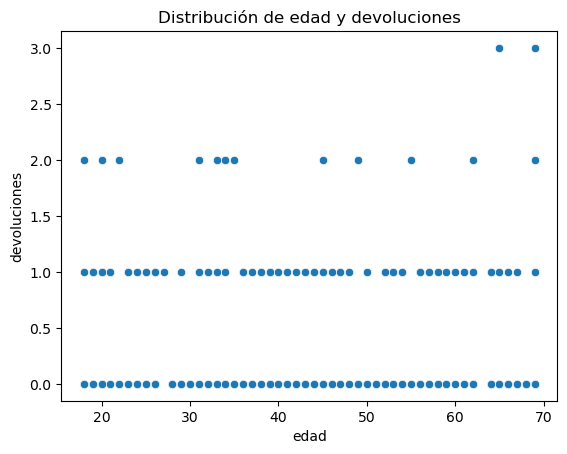

In [4]:
# SCATTERPLOT - BÁSICO
sns.scatterplot(x="edad", y="devoluciones", data=data)
plt.title("Distribución de edad y devoluciones")

plt.show()

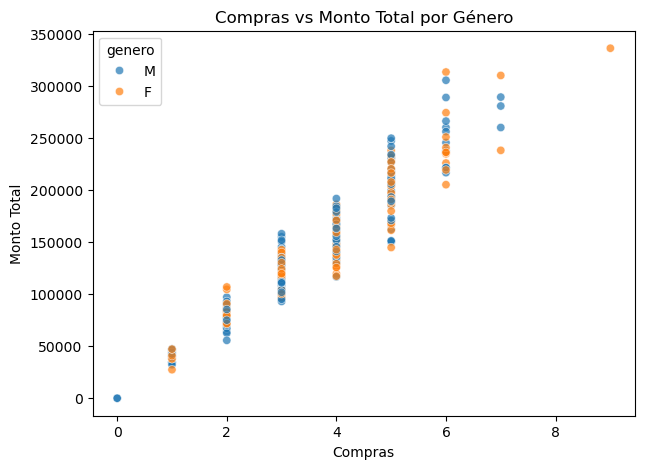

In [5]:
# SCATTER SEGMENTADO POR GÉNERO
plt.figure(figsize=(7,5))

sns.scatterplot(
    data=data,
    x="compras",
    y="monto_total",
    hue="genero",
    alpha=0.7
)
plt.title("Compras vs Monto Total por Género")
plt.xlabel("Compras")
plt.ylabel("Monto Total")
plt.show()

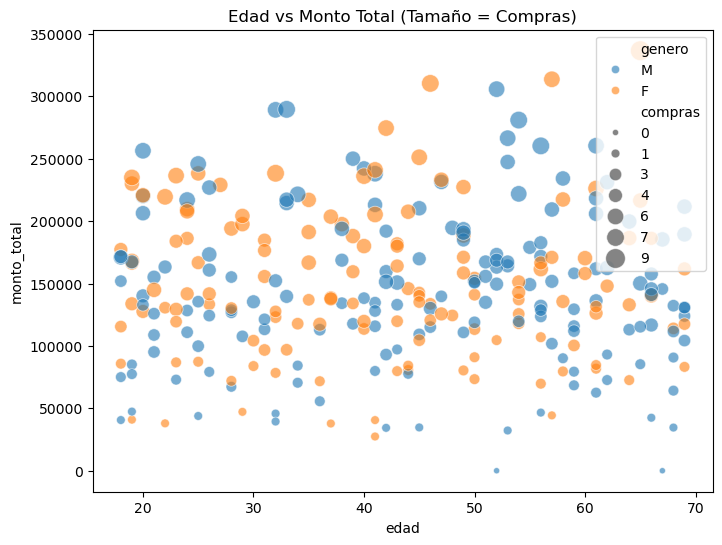

In [6]:
# SCATTERPLOT CON TAMAÑO DE PUNTO
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=data,
    x="edad",
    y="monto_total",
    size="compras",
    hue="genero",
    alpha=0.6,
    sizes=(20,200)
)

plt.title("Edad vs Monto Total (Tamaño = Compras)")
plt.show()

No se observa una relación lineal clara entre edad y monto_total.
Los puntos están dispersos a lo largo de todas las edades, lo que sugiere que la edad no es un predictor fuerte del gasto total.

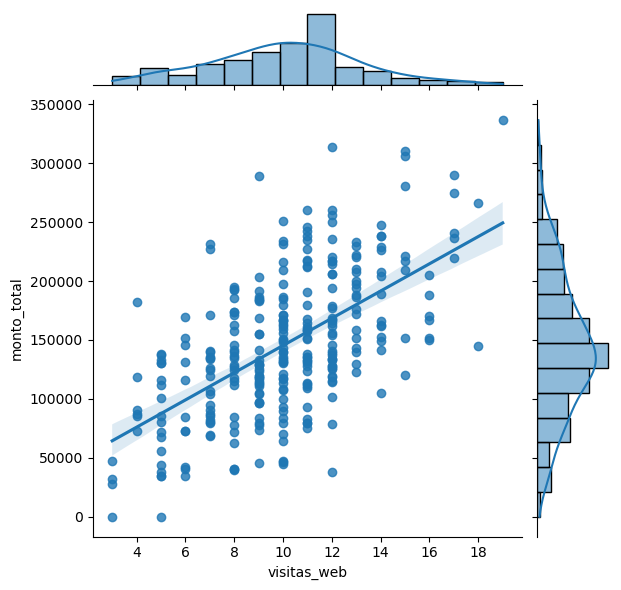

In [22]:
# JOINPLOT EXTRA
sns.jointplot(
    data=data,
    x="visitas_web",
    y="monto_total",
    kind="reg",
    height=6
)

En esta distribución se aprecia una correlacion positiva referente a visitas_web y monto_total, con este supuesto avanzamos con una matriz de correlación completa 

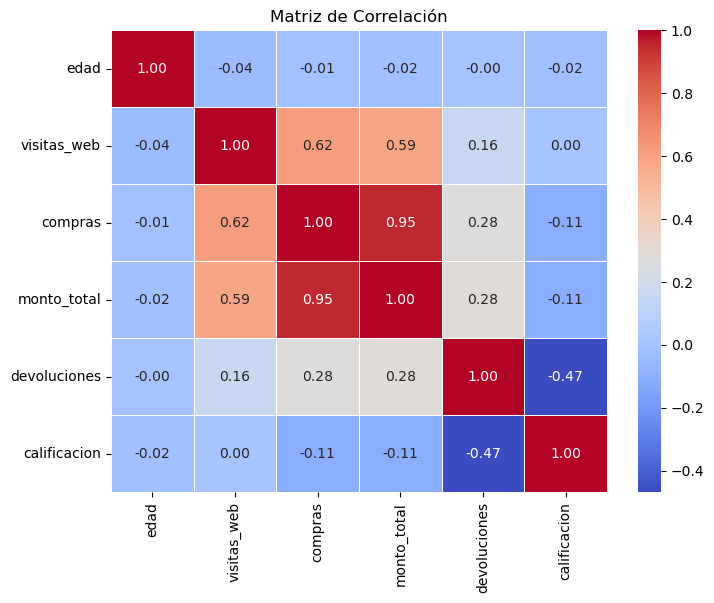

In [23]:
# MATRIZ DE CORRELACIÓN
corr = data.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Matriz de Correlación")
plt.show()

El supuesto anterior se valida con el histograma(0.62), pero aparece una correlación mayor: monto_compra con monto_total(0.95)

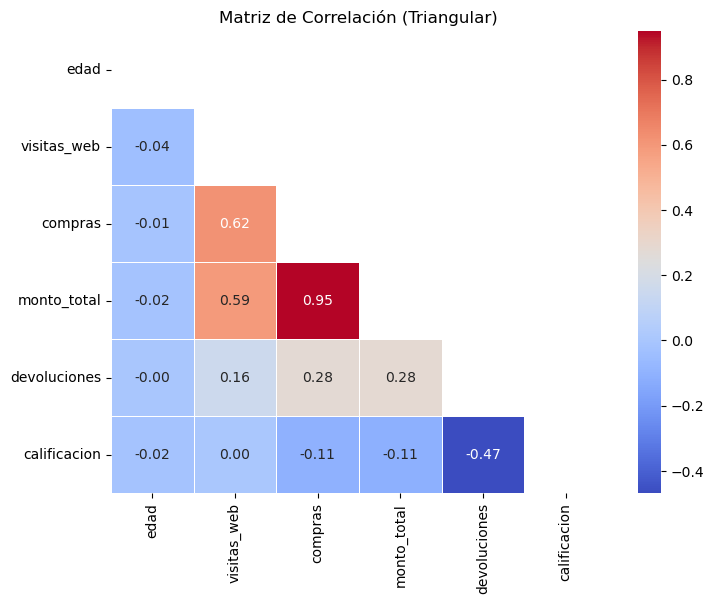

In [24]:
# MATRIZ DE CORRELACION TRIANGULAR
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Matriz de Correlación (Triangular)")
plt.show()

La **matriz de correlación** revela relaciones significativas entre variables clave del comportamiento del cliente. <br>
La variable compras presenta una **correlación positiva** muy fuerte con monto_total (R = 0.95), lo que confirma que el gasto acumulado se determina  por la frecuencia de compra.
<br>
Además, visitas_web muestra **correlación moderada** tanto con compras (R = 0.62) como con monto_total (R = 0.59), evidenciando que la interacción con la plataforma impacta directamente en el consumo final.
<br>
Finalmente, se identifica una **correlación negativa** moderada entre devoluciones y calificacion (R = -0.47), lo que sugiere que mayores niveles de devolución afectan negativamente la percepción del cliente.

In [ ]:
# COEFICIENTE DE PEARSON SOBRE monto_total
corr["monto_total"].sort_values(ascending=False)

monto_total     1.000000
compras         0.948432
visitas_web     0.592281
devoluciones    0.283456
edad           -0.018028
calificacion   -0.112207
Name: monto_total, dtype: float64

Correlación visitas_web vs monto_total
Coeficiente de Pearson (R): 0.592
p-value: 0.0


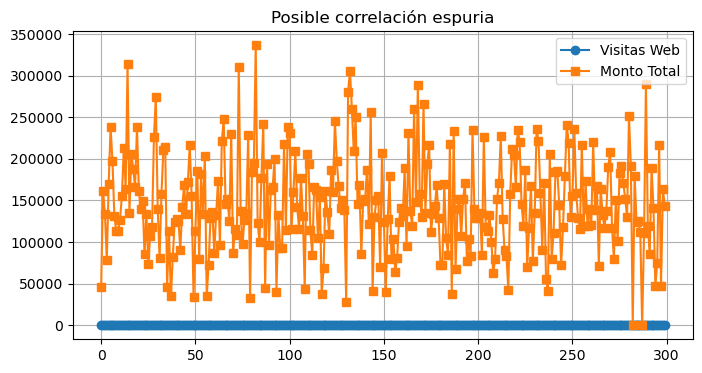


Correlación compras vs monto_total
Coeficiente de Pearson (R): 0.948
p-value: 0.0


In [36]:
from scipy.stats import pearsonr

# Calcular correlación aparente
r, p = pearsonr(data["visitas_web"], data["monto_total"])

print("Correlación visitas_web vs monto_total")
print("Coeficiente de Pearson (R):", round(r,3))
print("p-value:", round(p,5))

plt.figure(figsize=(8,4))

plt.plot(data["visitas_web"], label="Visitas Web", marker="o")
plt.plot(data["monto_total"], label="Monto Total", marker="s")

plt.title("Posible correlación espuria")
plt.legend()
plt.grid(True)
plt.show()

# Verificamos variable mediadora
r2, p2 = pearsonr(data["compras"], data["monto_total"])

print("\nCorrelación compras vs monto_total")
print("Coeficiente de Pearson (R):", round(r2,3))
print("p-value:", round(p2,5))

Se identificó una correlación moderada entre visitas_web y monto_total (R = 0.59, p < 0.05).<br>
Sin embargo, la variable compras presenta una correlación mucho más fuerte con monto_total (R = 0.95).<br>
Esto sugiere que la relación entre visitas_web y monto_total podría ser indirecta, mediada por la frecuencia de compra, podría tratarse de una correlación espuria parcial.

Compras vs Monto Total
R = 0.948
p-value = 0.0


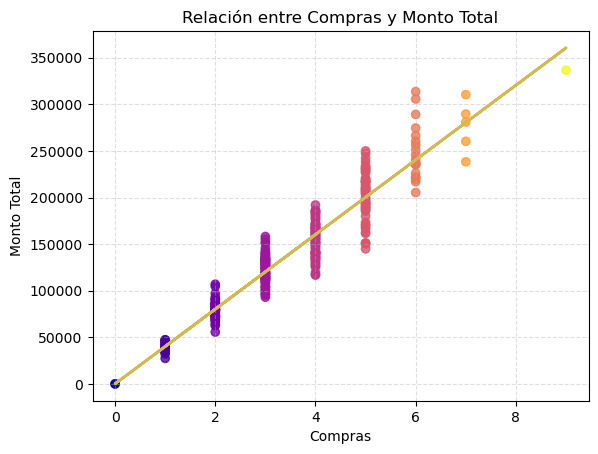

In [60]:
# Asociación 1: Compras vs Monto Total
# Calcular Pearson
R, p = pearsonr(data["compras"], data["monto_total"])

print("Compras vs Monto Total")
print("R =", round(R,3))
print("p-value =", round(p,5))

# Línea de tendencia
z = np.polyfit(data["compras"], data["monto_total"], 1)
p = np.poly1d(z)

plt.scatter(
    data["compras"],
    data["monto_total"],
    c=data["compras"],   # color según monto
    cmap="plasma",
    alpha=0.8
)
plt.plot(
    data["compras"],
    p(data["compras"]),
    color="#D1BA53",     # gris elegante
    linewidth=2
)

plt.title("Compras vs Monto Total", fontsize=12)
plt.title("Relación entre Compras y Monto Total")
plt.xlabel("Compras")
plt.ylabel("Monto Total")
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()

El análisis muestra una relación lineal positiva fuerte entre compras y monto_total.<br>
El coeficiente de Pearson fue R = 0.95 (p < 0.01), lo que indica una asociación estadísticamente significativa.<br>
El gráfico de dispersión confirma visualmente esta tendencia ascendente, evidenciando que a mayor número de compras, mayor es el gasto total acumulado del cliente.

Visitas Web vs Monto Total
R = 0.592
p-value = 0.0


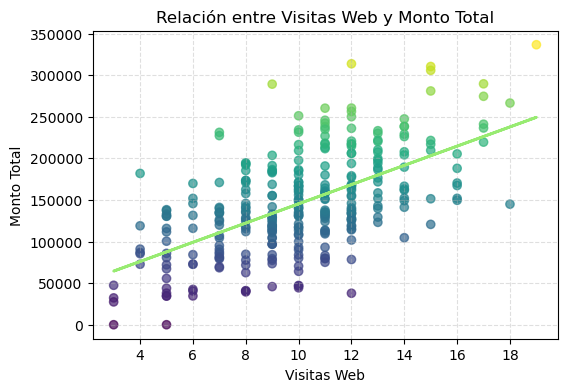

In [59]:
# ASOCIACIÓN 2: Visitas Web vs Monto Total
r, p = pearsonr(data["visitas_web"], data["monto_total"])

print("Visitas Web vs Monto Total")
print("R =", round(r,3))
print("p-value =", round(p,5))

z = np.polyfit(data["visitas_web"], data["monto_total"], 1)
p = np.poly1d(z)

plt.figure(figsize=(6,4))

plt.scatter(
    data["visitas_web"],
    data["monto_total"],
    c=data["monto_total"],   # color según monto
    cmap="viridis",
    alpha=0.7
)

plt.plot(
    data["visitas_web"],
    p(data["visitas_web"]),
    color="#98EB72",     # gris elegante
    linewidth=2
)

plt.title("Relación entre Visitas Web y Monto Total", fontsize=12)
plt.xlabel("Visitas Web")
plt.ylabel("Monto Total")
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()


Se observa una correlación moderada entre visitas_web y monto_total (R = 0.59, p < 0.05).
Sin embargo, la dispersión es mayor en comparación con la relación compras–monto_total, lo que sugiere que esta asociación podría estar mediada por la variable compras.